# Optimización Iterativa

In [ ]:
import numpy as np

# Función de costo de ejemplo
def cost_function(params):
    return params[0] ** 2 + 2 * params[1] ** 2

# Gradiente de la función de costo
def gradient(params):
    return np.array([2 * params[0], 4 * params[1]])

# Parámetros iniciales
params = np.array([3.0, 2.0])
learning_rate = 0.1
max_iterations = 100

# Gradiente descendente
for i in range(max_iterations):
    gradient_value = gradient(params)
    params -= learning_rate * gradient_value
    cost = cost_function(params)
    print(f"Iteración {i+1}: Parámetros = {params}, Costo = {cost}")


Iteración 1: Parámetros = [2.4 1.2], Costo = 8.64
Iteración 2: Parámetros = [1.92 0.72], Costo = 4.7232
Iteración 3: Parámetros = [1.536 0.432], Costo = 2.732544
Iteración 4: Parámetros = [1.2288 0.2592], Costo = 1.6443187200000002
Iteración 5: Parámetros = [0.98304 0.15552], Costo = 1.0147405824000002
Iteración 6: Parámetros = [0.786432 0.093312], Costo = 0.6358895493120001
Iteración 7: Parámetros = [0.6291456 0.0559872], Costo = 0.4020933191270401
Iteración 8: Parámetros = [0.50331648 0.03359232], Costo = 0.25558436696555525
Iteración 9: Parámetros = [0.40265318 0.02015539], Costo = 0.16294206623868523
Iteración 10: Parámetros = [0.32212255 0.01209324], Costo = 0.1040554280898213
Iteración 11: Parámetros = [0.25769804 0.00725594], Costo = 0.06651357602842822
Iteración 12: Parámetros = [0.20615843 0.00435356], Costo = 0.0425392053965334
Iteración 13: Parámetros = [0.16492674 0.00261214], Costo = 0.02721447747958353
Iteración 14: Parámetros = [0.1319414  0.00156728], Costo = 0.01741344

# Grid Search de forma ordenada

In [ ]:
# Importamos las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargamos un conjunto de datos de ejemplo (usaremos iris para este ejemplo)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el clasificador SVM
svm_classifier = SVC()

# Definimos la cuadrícula de hiperparámetros que queremos probar
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 0.01, 0.001]}

# Inicializamos la Búsqueda en Cuadrícula con el clasificador y la cuadrícula de hiperparámetros
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Ajustamos la Búsqueda en Cuadrícula a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores Hiperparámetros:", best_params)

# Hacemos predicciones en el conjunto de prueba con el modelo ajustado
y_pred = grid_search.predict(X_test)

# Evaluamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del Modelo:", accuracy)

Mejores Hiperparámetros: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Precisión del Modelo: 1.0


# Grid search vs random search

In [ ]:
# Importamos las bibliotecas necesarias
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import numpy as np

# Cargamos el conjunto de datos de cáncer de mama de Wisconsin
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el clasificador RandomForest
rf_classifier = RandomForestClassifier()

# Definimos la cuadrícula de hiperparámetros para Grid Search
param_grid_grid_search = {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Definimos el espacio de búsqueda para Random Search (con más opciones)
param_dist_random_search = {'n_estimators': np.arange(50, 1000, 50), 'max_depth': [None] + list(np.arange(10, 110, 10)), 'min_samples_split': [2, 5, 10, 20, 30, 40, 50]}

# Inicializamos la Búsqueda en Cuadrícula
grid_search = GridSearchCV(rf_classifier, param_grid_grid_search, cv=5, scoring='accuracy')

# Inicializamos la Búsqueda Aleatoria
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_random_search, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Ajustamos ambos modelos a los datos de entrenamiento
grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba con los modelos ajustados
y_pred_grid_search = grid_search.predict(X_test)
y_pred_random_search = random_search.predict(X_test)

# Evaluamos la precisión de ambos modelos
accuracy_grid_search = accuracy_score(y_test, y_pred_grid_search)
accuracy_random_search = accuracy_score(y_test, y_pred_random_search)

# Mostramos los resultados
print("Precisión con Grid Search:", accuracy_grid_search)
print("Mejores hiperparámetros encontrados por Grid Search:", grid_search.best_params_)
print("\nPrecisión con Random Search:", accuracy_random_search)
print("Mejores hiperparámetros encontrados por Random Search:", random_search.best_params_)


Precisión con Grid Search: 0.9649122807017544
Mejores hiperparámetros encontrados por Grid Search: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}

Precisión con Random Search: 0.9649122807017544
Mejores hiperparámetros encontrados por Random Search: {'n_estimators': 650, 'min_samples_split': 2, 'max_depth': 40}


# Hill climbing

In [ ]:
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar datos y dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_space = {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Inicializar el clasificador RandomForest
rf_classifier = RandomForestClassifier()

# Inicializar hiperparámetros aleatorios
current_params = {param: random.choice(values) for param, values in param_space.items()}

# Definir función de evaluación
def evaluate(params):
    rf_classifier.set_params(**params)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Hill Climbing
num_iterations = 100
for _ in range(num_iterations):
    # Generar vecino con pequeñas perturbaciones
    neighbor_params = {param: value + random.choice([-1, 1]) for param, value in current_params.items()}

    # Evaluar la mejora
    current_score = evaluate(current_params)
    neighbor_score = evaluate(neighbor_params)

    # Actualizar si encontramos una solución mejor
    if neighbor_score > current_score:
        current_params = neighbor_params

# Resultados finales
print("Mejor Precisión:", evaluate(current_params))
print("Mejores Hiperparámetros:", current_params)


Mejor Precisión: 0.9649122807017544
Mejores Hiperparámetros: {'n_estimators': 196, 'max_depth': 34, 'min_samples_split': 10}


# Gradient Descent para parámetros de Regresión Lineal

** Buscar un ejemplo más complejo.

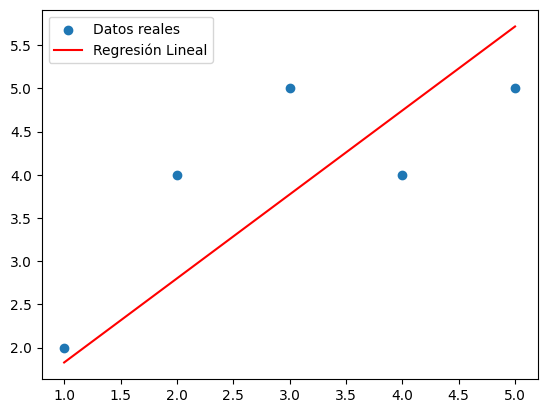

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Función de pérdida (Error Cuadrático Medio)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Inicializar parámetros
slope = 0
intercept = 0

# Hiperparámetros
learning_rate = 0.01
num_iterations = 100

# Gradiente Descendente
for _ in range(num_iterations):
    # Calcular predicciones
    predictions = slope * X + intercept

    # Calcular derivadas parciales
    d_slope = -2 * np.mean(X * (y - predictions))
    d_intercept = -2 * np.mean(y - predictions)

    # Actualizar parámetros
    slope -= learning_rate * d_slope
    intercept -= learning_rate * d_intercept

# Visualizar resultados
plt.scatter(X, y, label='Datos reales')
plt.plot(X, slope * X + intercept, color='red', label='Regresión Lineal')
plt.legend()
plt.show()


# Stochastic Gradient Descent

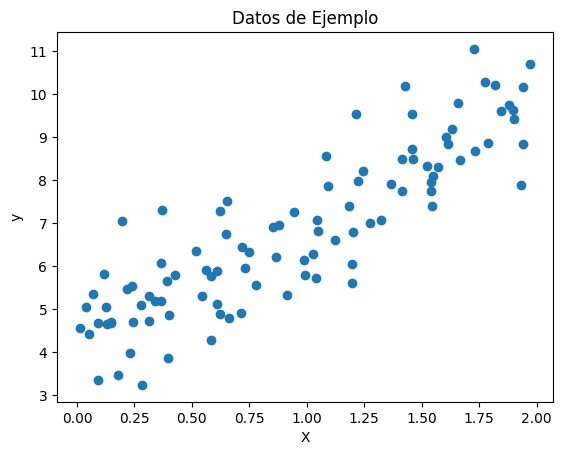

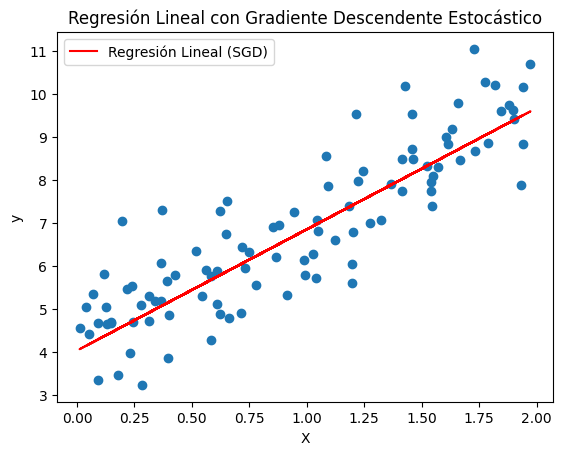

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualizar datos
plt.scatter(X, y)
plt.title("Datos de Ejemplo")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Inicializar parámetros
theta = np.random.randn(2, 1)  # [intercept, slope]
learning_rate = 0.01
num_iterations = 1000
m = len(X)

# Añadir columna de unos a X para el término de intercepción
X_b = np.c_[np.ones((m, 1)), X]

# Implementación del Gradiente Descendente Estocástico (SGD)
for iteration in range(num_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

# Parámetros aprendidos
intercept_sgd, slope_sgd = theta[0][0], theta[1][0]

# Visualizar la regresión lineal obtenida con SGD
plt.scatter(X, y)
plt.plot(X, slope_sgd * X + intercept_sgd, color='red', label='Regresión Lineal (SGD)')
plt.title("Regresión Lineal con Gradiente Descendente Estocástico")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
